In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models,layers
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/kc_house_data.csv') #direccion de la base de datos
df.tail(20) #que sacque 20 filas


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21593,8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
21594,5087900040,20141017T000000,350000.0,4,2.75,2500,5995,2.0,0,0,...,8,2500,0,2008,0,98042,47.3749,-122.107,2530,5988
21595,1972201967,20141031T000000,520000.0,2,2.25,1530,981,3.0,0,0,...,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282
21596,7502800100,20140813T000000,679950.0,5,2.75,3600,9437,2.0,0,0,...,9,3600,0,2014,0,98059,47.4822,-122.131,3550,9421
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
21598,8956200760,20141013T000000,541800.0,4,2.50,3118,7866,2.0,0,2,...,9,3118,0,2014,0,98001,47.2931,-122.264,2673,6500
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,249000205,20141015T000000,1537000.0,5,3.75,4470,8088,2.0,0,0,...,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21601,5100403806,20150407T000000,467000.0,3,2.50,1425,1179,3.0,0,0,...,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21602,844000965,20140626T000000,224000.0,3,1.75,1500,11968,1.0,0,0,...,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303


In [ ]:
df.isnull().values.any()


False

In [ ]:
df.info() #información de la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Figure size 640x480 with 0 Axes>

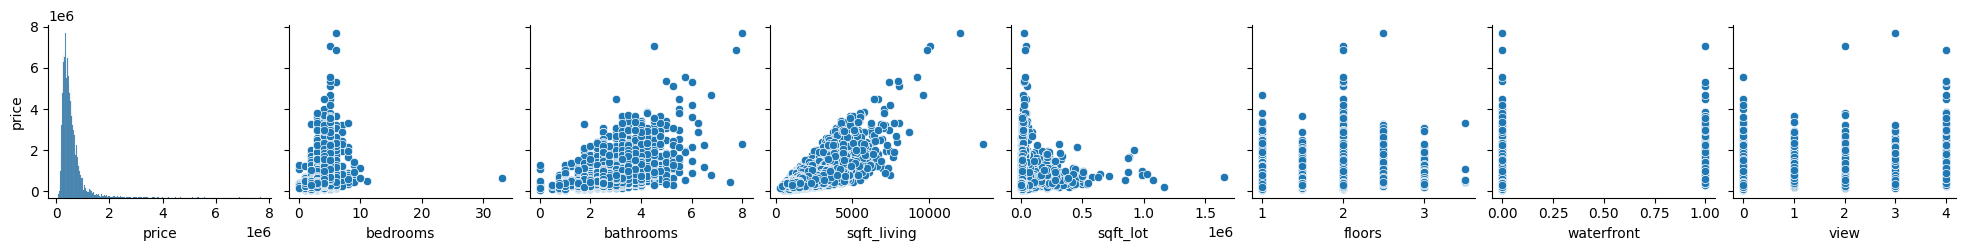

<Figure size 640x480 with 0 Axes>

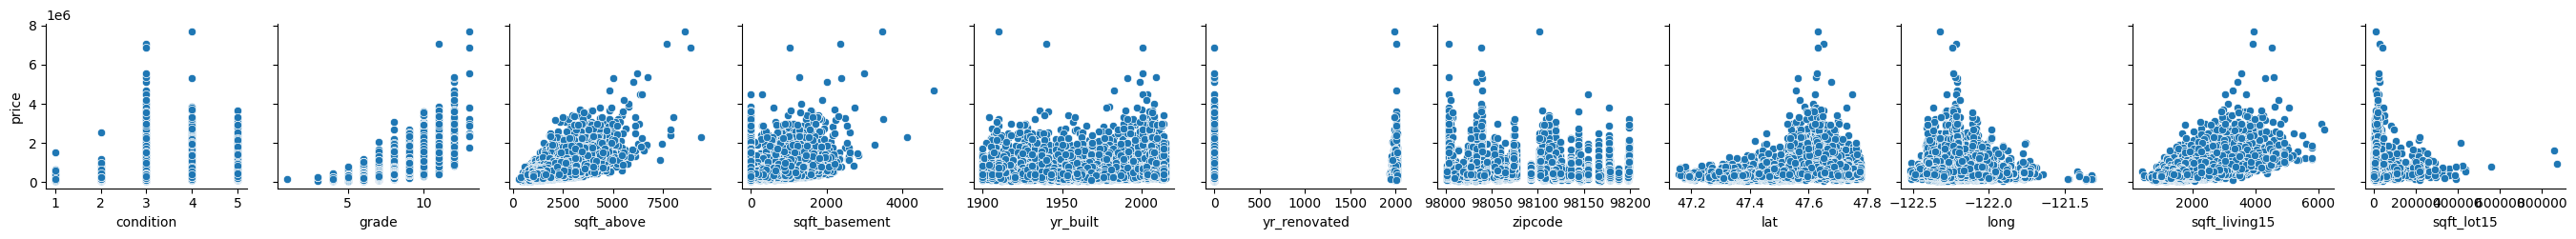

In [ ]:
plt.figure()
cols_to_plot = df.columns[2:10] #que grafique de la columna 0 hasta la 3
sns.pairplot(df,x_vars=cols_to_plot,y_vars='price',diag_kind='hist') #dice que x sea cada columna pero que y sea el precio y que haga histogramas con eso
plt.show() #graficar

plt.figure()
cols_to_plot = df.columns[10:21] #que grafique de la columna 0 hasta la 3
sns.pairplot(df,x_vars=cols_to_plot,y_vars='price',diag_kind='hist') #dice que x sea cada columna pero que y sea el precio y que haga histogramas con eso
plt.show() #graficar

In [ ]:
correlations=df.corr()
correlations['price']

<ipython-input-200-549efbb0870b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()


id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

<ipython-input-201-dfd1ba731a2c>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


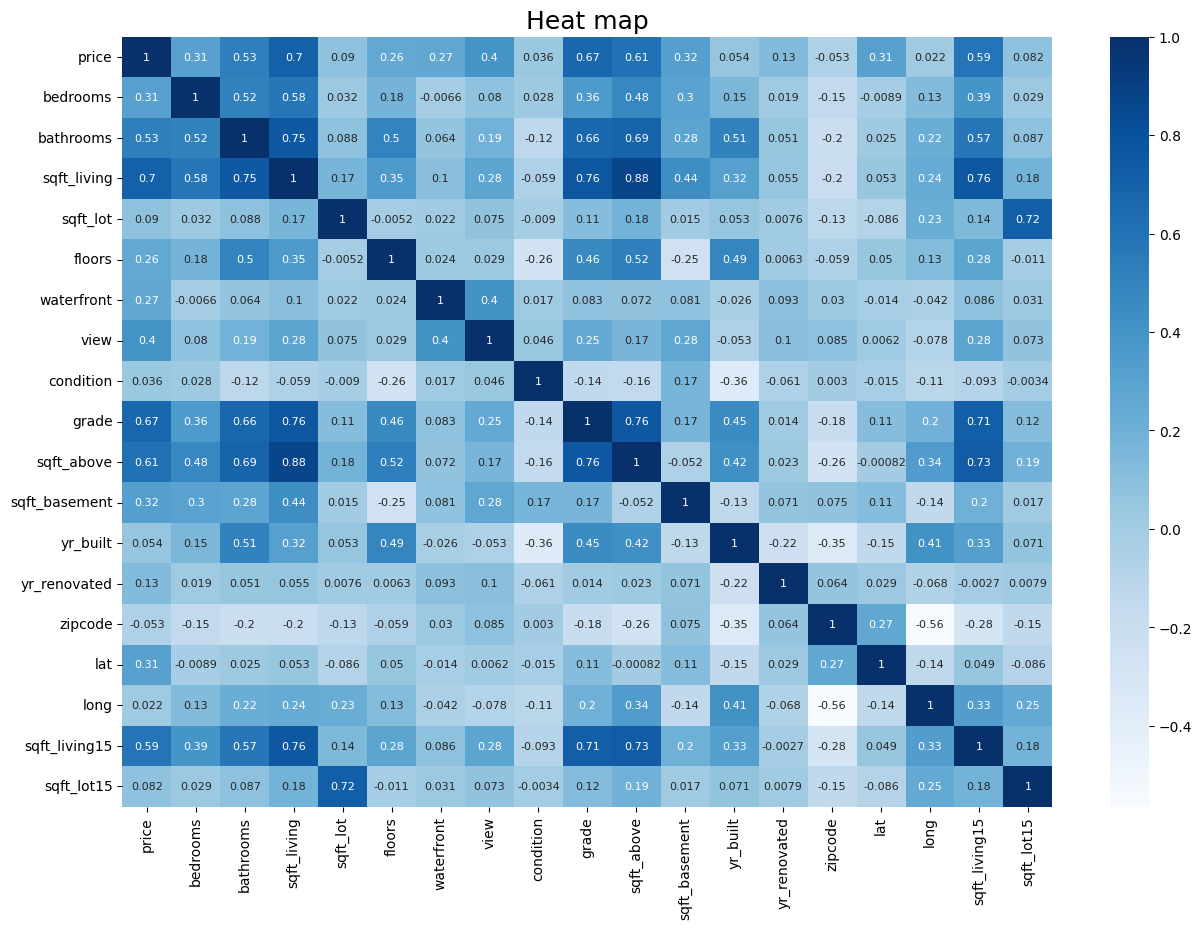

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
title = "Heat map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])


ax.set_xticks([])
ax.set_yticks([])

# Borramos la columna de id para poder hacer el mapa de calor del precio de las casas
df=df.drop(df.columns[[0]],axis=1)
correlation=df.corr()
sns.heatmap(correlation, cmap="Blues", annot=True, annot_kws={'size': 8})
plt.show()

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Seleccionar la columna de la variable objetivo
target_col = 'price'
target_corr = corr_matrix[target_col]

# Crear una máscara booleana para seleccionar las columnas con una correlación mayor a 0.5
mask = target_corr.abs() > 0.5
mask['price']=True
print(mask)
# Seleccionar solo las columnas que cumplen con el criterio de correlación
df = df.drop(df.columns[[0]],axis=1)
selected_cols = df.columns[mask]
# Crear un nuevo DataFrame solo con las columnas seleccionadas
new_df = df[selected_cols]
print(new_df.columns)

price             True
bedrooms         False
bathrooms         True
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade             True
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15       False
Name: price, dtype: bool
Index(['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15'],
      dtype='object')


<ipython-input-202-38036a4df21b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


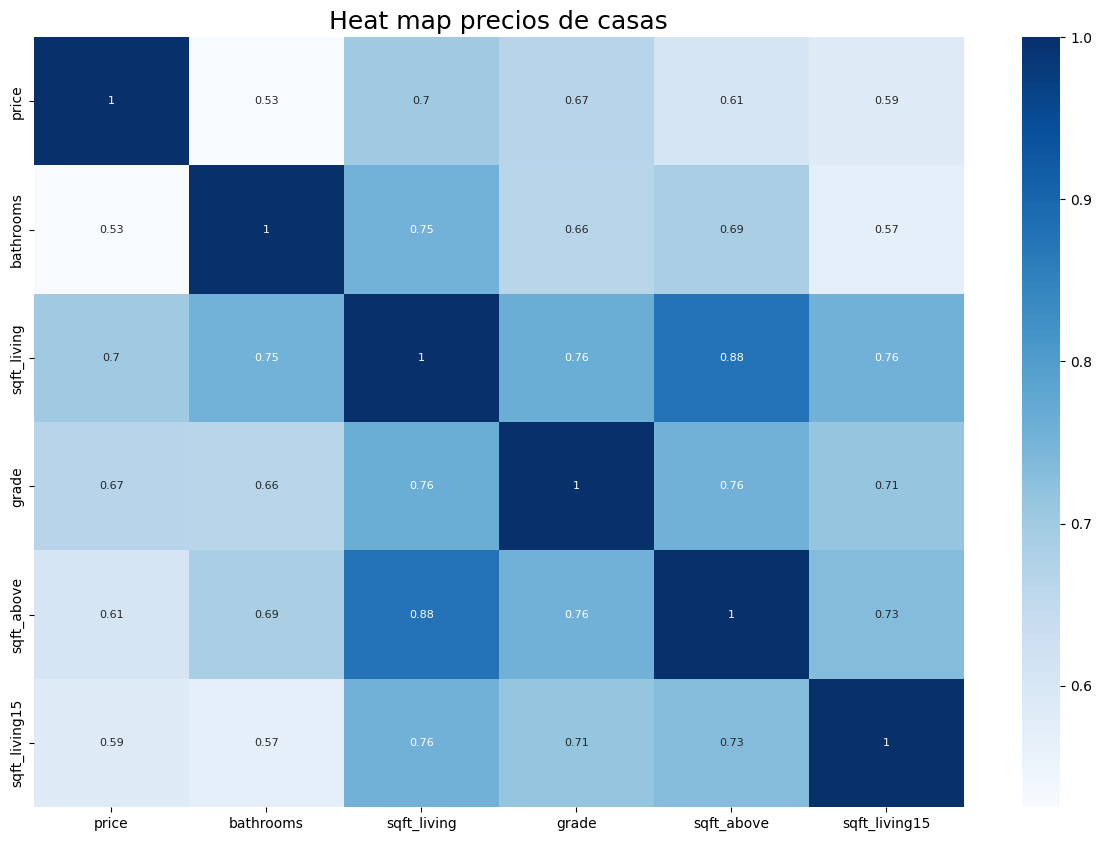

6


In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
title = "Heat map precios de casas"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])


ax.set_xticks([])
ax.set_yticks([])
nw_correlation=new_df.corr()
sns.heatmap(nw_correlation, cmap="Blues", annot=True, annot_kws={'size': 8})
plt.show()
print(len(new_df.columns))
# print(new_df['price'].tail())

In [ ]:
#Dividimos la base de datos en train y cross validation
X=new_df.drop('price',axis=1) #coge la matriz con todas las variables y elimina la columna de precio
y=df['price']#y es la columna de precio
# con todas las otras variables y como se comportan respecto al precio, la red predice cual deberia ser el precio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#train_test_split coge el numero total de ejemplos y los separa en los datos que son para entrenar (mayoria) y los que son de prueba 

#X es la matriz de todas las variables
#y matriz de precio
print((X_train.shape)) #los registros para entrenar 80:20
print(X_test.shape) #los registros para probar 
print(y_train.shape) # lo que esperamos de X_train
print(y_test.shape) #lo que esperamos de X_test
print (y)
print (X)

(17290, 5)
(4323, 5)
(17290,)
(4323,)
0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64
       bathrooms  sqft_living  grade  sqft_above  sqft_living15
0           1.00         1180      7        1180           1340
1           2.25         2570      7        2170           1690
2           1.00          770      6         770           2720
3           3.00         1960      7        1050           1360
4           2.00         1680      8        1680           1800
...          ...          ...    ...         ...            ...
21608       2.50         1530      8        1530           1530
21609       2.50         2310      8        2310           1830
21610       0.75         1020      7        1020           1020
21611       2.50         1600      8        1600           1410
21612       0.75 

In [ ]:
#Normalizamos las entradas, (ponemos los datos entre 0 y 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train) #está transformando las datos de entrenar en una escala entre 0 y 1 y entrenando(aprendiendo los parametros de escala)
# el modelo construido por nosotros aprenderá la media y la varianza de las características del conjunto de entrenamiento. 
#Estos parámetros aprendidos se utilizan luego para escalar nuestros datos de prueba.

X_test = scaler.transform(X_test) #solo transforma los datos de prueba en una escala de 0 a 1
#podemos usar la misma media y varianza que se calcula a partir de nuestros datos de entrenamiento para transformar nuestros datos de prueba.
# Por lo tanto, los parámetros aprendidos por nuestro modelo utilizando los datos de entrenamiento nos ayudarán a transformar 
#nuestros datos de prueba.

# everything has been scaled between 1 and 0
print('Max: ',X_train.max()) 
print('Min: ', X_train.min())


#print('Max: ',X_test.max()) 
#print('Min: ', X_test.min())


Max:  1.0000000000000002
Min:  0.0


In [ ]:
#Creamos la red neuronal para el módelo con keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
#MODELO NO LINEAL
model = Sequential() #pila lineal de capas, tiene un tensor de entrada y un tensor de salida

model.add(Dense(15,activation='relu')) #tenemos 7 capas, usando la función de activación relu, cada una con 15 neuronas
model.add(Dense(15,activation='relu')) #con la relu por que la relu es más facil de entrenar, ya que la sigmoide es muy lenta 
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1)) #salida, por que solo hay una neurona

#prepara el modeo para ser entrenado
#usamos L2 para funcion de perdida con (mse)
model.compile(optimizer='adam',loss='mse') #funcion de perdida con mse, regresor adam que es un metodo de gradiente descendiente (ajusta pesos y sesisgos de forma eficiente para que meojre)

In [ ]:
model.fit(X_train,y_train,batch_size=300,epochs=600,validation_data=(X_test,y_test))
#funcion fit es para entrenar
#X_train son los datos de entrada
#Y_train target data (lo que esperamos?)
#epochs es cuantas veces se repite el entrenamiento para cada ejemplo
#batch_size numero de ejemplos que se introducen en la red
#validation_data datos sobre donde vamos a evaluar la perdida 

#model.fit devuelve la lista de perdidas con atributo history que lo llamamos mas abajo

Epoch 1/600
58/58 [==============================] - 2s 6ms/step - loss: 421617369088.0000 - val_loss: 445873324032.0000
Epoch 2/600
58/58 [==============================] - 0s 3ms/step - loss: 421561532416.0000 - val_loss: 445670293504.0000
Epoch 3/600
58/58 [==============================] - 0s 4ms/step - loss: 420434804736.0000 - val_loss: 442389168128.0000
Epoch 4/600
58/58 [==============================] - 0s 3ms/step - loss: 408946769920.0000 - val_loss: 414861459456.0000
Epoch 5/600
58/58 [==============================] - 0s 3ms/step - loss: 341222195200.0000 - val_loss: 287255199744.0000
Epoch 6/600
58/58 [==============================] - 0s 3ms/step - loss: 167920746496.0000 - val_loss: 116415766528.0000
Epoch 7/600
58/58 [==============================] - 0s 3ms/step - loss: 91137515520.0000 - val_loss: 110002233344.0000
Epoch 8/600
58/58 [==============================] - 0s 3ms/step - loss: 89840951296.0000 - val_loss: 109134053376.0000
Epoch 9/600
58/58 [===============

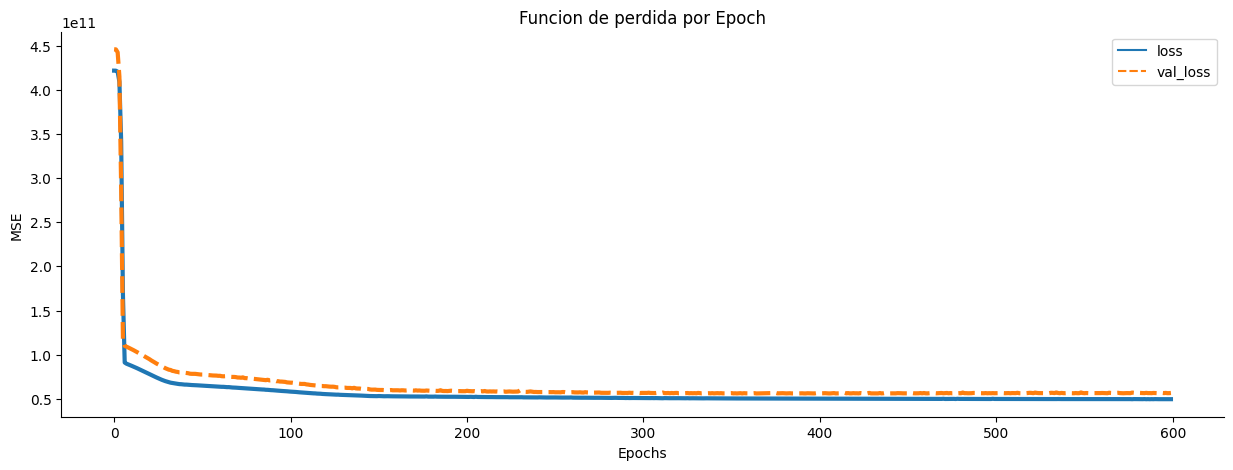

In [ ]:
losses = pd.DataFrame(model.history.history)
#grafica de los datos de testeo y lo que esperamos de los datos de testeo
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Funcion de perdida por Epoch')
sns.despine()

In [ ]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test) # modelo de prediccion con los datos de testeo

print(y_test)
print (predictions)
print('MAE: ',mean_absolute_error(y_test,predictions)) #L1
print('MSE: ',mean_squared_error(y_test,predictions)) #MSE
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions))) #L2
print('Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales' ,explained_variance_score(y_test,predictions)) #varianza con lo que esperamos de los datos de testeo 
#y las predicciones que hizo despues de entrenar el modelo

136/136 [==============================] - 0s 1ms/step
4904     240000.0
6348     440000.0
13385    740000.0
12450    344950.0
2119     585000.0
           ...   
44       309000.0
14451    525000.0
7055     241000.0
11188    442250.0
12480    297000.0
Name: price, Length: 4323, dtype: float64
[[365470.5 ]
 [430640.44]
 [730919.44]
 ...
 [354384.44]
 [480037.06]
 [443474.56]]
MAE:  146760.43559160305
MSE:  56698731183.395035
RMSE:  238114.9537164666
Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales 0.6330664977511


<ipython-input-211-15d9a9a6fb67>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)




Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


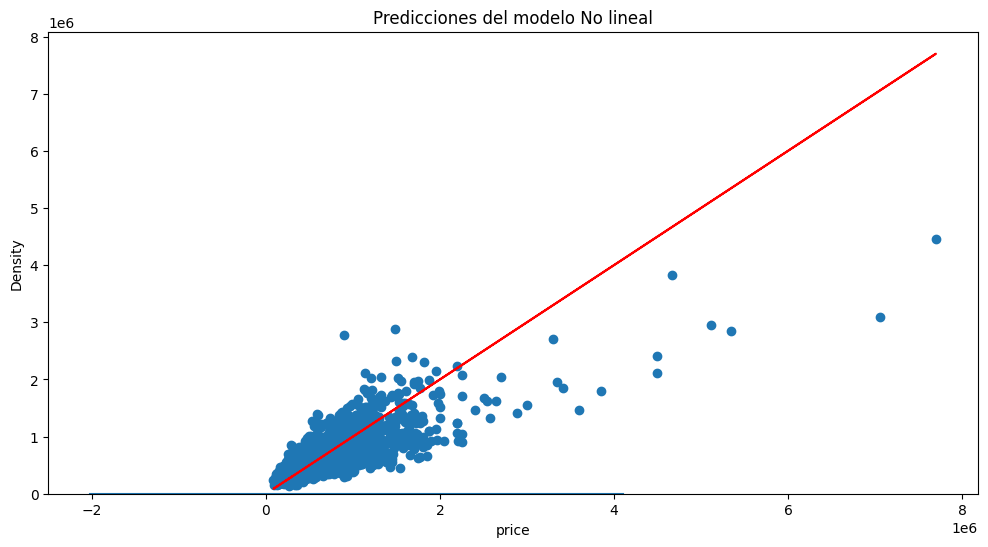

In [ ]:
errors = y_test - predictions.flatten() #error entre lo que esperamos y la prediccion del modelo
#.flatten convierte la matriz en una dimension
plt.figure(figsize=(12,6))
sns.distplot(errors)



print('\n\nDescriptive Statistics:\n',df['price'].describe())
plt.scatter(y_test,predictions) #los punticos
plt.plot(y_test,y_test,'r') #la linea
plt.title("Predicciones del modelo No lineal")
plt.show()



In [ ]:
#MODELO LINEAL
#Un modelo lineal utiliza una función de activación lineal en todas sus neuronas. 
#Esto significa que la salida de cada neurona es una combinación lineal de las entradas ponderadas.
model2 = Sequential()

model2.add(Dense(15))
model2.add(Dense(15))
model2.add(Dense(15))
model2.add(Dense(15))
model2.add(Dense(15))
model2.add(Dense(15))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')
model2.fit(X_train,y_train,batch_size=300,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
58/58 [==============================] - 2s 6ms/step - loss: 421610258432.0000 - val_loss: 445838884864.0000
Epoch 2/600
58/58 [==============================] - 0s 3ms/step - loss: 421053825024.0000 - val_loss: 443552563200.0000
Epoch 3/600
58/58 [==============================] - 0s 3ms/step - loss: 405201453056.0000 - val_loss: 395401428992.0000
Epoch 4/600
58/58 [==============================] - 0s 3ms/step - loss: 260348100608.0000 - val_loss: 138933403648.0000
Epoch 5/600
58/58 [==============================] - 0s 3ms/step - loss: 93261848576.0000 - val_loss: 109894270976.0000
Epoch 6/600
58/58 [==============================] - 0s 3ms/step - loss: 89224593408.0000 - val_loss: 108254380032.0000
Epoch 7/600
58/58 [==============================] - 0s 3ms/step - loss: 87962304512.0000 - val_loss: 106691272704.0000
Epoch 8/600
58/58 [==============================] - 0s 4ms/step - loss: 86633807872.0000 - val_loss: 105564946432.0000
Epoch 9/600
58/58 [=================

136/136 [==============================] - 0s 1ms/step
MAE:  159711.1148542995
MSE:  71352683923.57623
RMSE:  267119.2316617735
Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales 0.5381144920142026


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


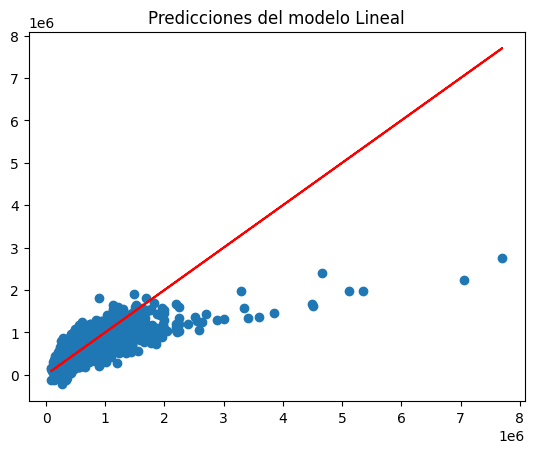

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

predictions2 = model2.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions2))
print('MSE: ',mean_squared_error(y_test,predictions2))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions2)))
print('Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales' ,explained_variance_score(y_test,predictions2))

print('\n\nDescriptive Statistics:\n',df['price'].describe())
plt.scatter(y_test,predictions2)
plt.title("Predicciones del modelo Lineal")
plt.plot(y_test,y_test,'r')
plt.show()

<ipython-input-214-1056b764908a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='price', ylabel='Density'>

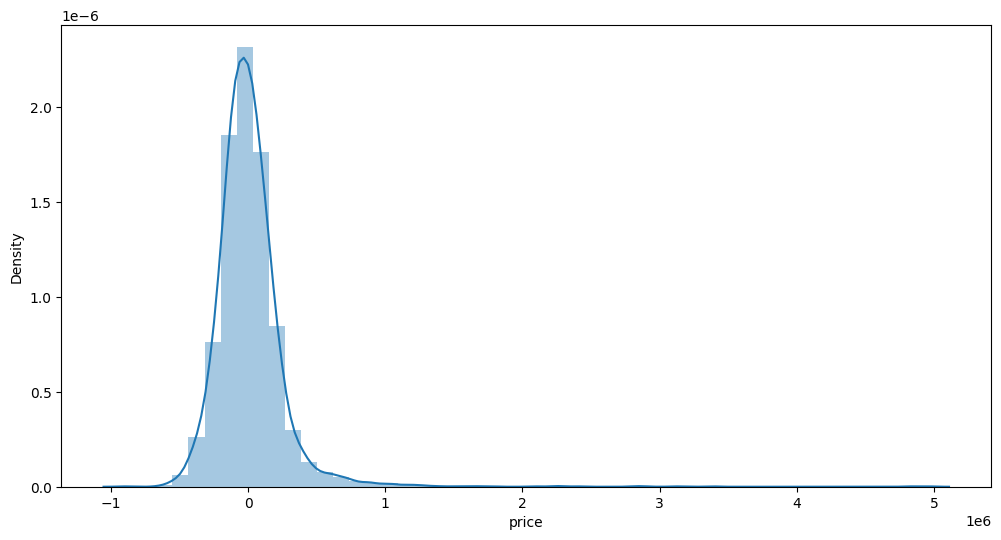

In [ ]:
errors = y_test - predictions2.flatten()
plt.figure(figsize=(12,6))
sns.distplot(errors)

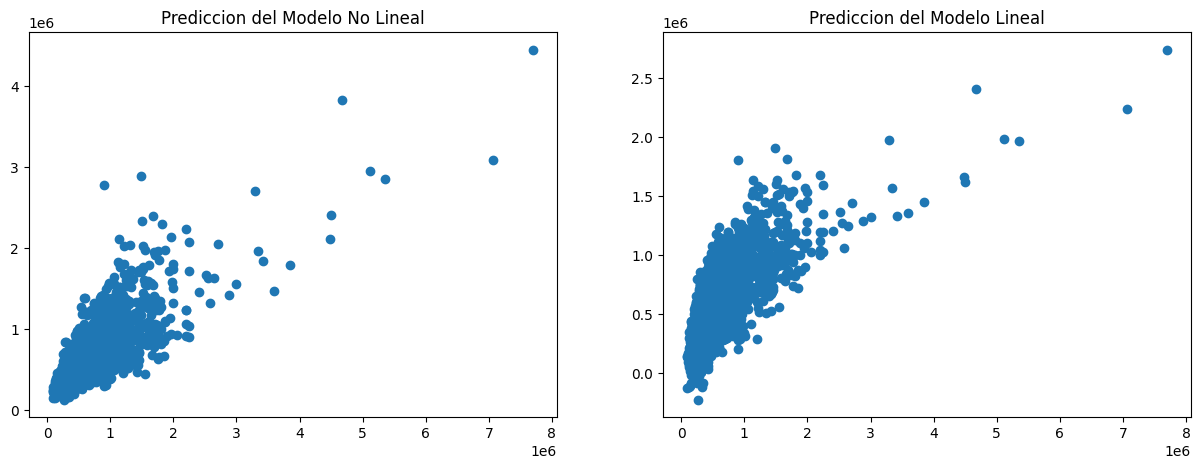

In [ ]:
#plot 1:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(y_test,predictions)
plt.title('Prediccion del Modelo No Lineal')

#plot 2:

plt.subplot(1, 2, 2)
plt.scatter(y_test,predictions2)
plt.title('Prediccion del Modelo Lineal')
plt.show()


RED NEURONAL CON NUMPY

In [ ]:
# Define the hyperparameters
learning_rate = 0.01 
epochs = 10000
y_t=y_train.values.reshape(17290,3)
# Define the weights and biases
weights = np.random.randn(17,1)*0.01
bias = 0
losses=[]
# Define the linear regression model
def linear_regression(x, weights, bias):
    return np.dot(x, weights) + bias

# Define the mean squared error loss function
def mse_loss(y, y_pred):
    return np.mean(np.square(y - y_pred))

# Define the gradient descent function to update weights and biases
def gradient_descent(x, y, y_pred, weights, bias, learning_rate):
    dw = np.dot(x.T, (y_pred - y)) / len(y)
    db = np.mean(y_pred - y)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

# Train the model
for i in range(epochs):
    # Forward pass
    y_pred = linear_regression(X_train, weights, bias)
    
    # Compute the loss
    loss = mse_loss(y_t, y_pred)
    # print(X_train.shape, y_train.shape, y_pred.shape, weights.shape)
    
    # Backward pass
    weights, bias = gradient_descent(X_train, y_t, y_pred, weights, bias, learning_rate)
    
    # Print the loss every 100 epochs
    if i % 10 == 0:
        print(f"Epoch {i}: loss={loss}")
        losses.append(loss)

print(loss.min())

ValueError: ignored